### Project 1

Project description: 
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

Reading the data from csv files

In [50]:
import pandas as pd
import numpy as np
data = pd.read_csv('bitcoin_dataset.csv', parse_dates=['Date'])
test = pd.read_csv('test_set.csv')

Observing the first few rows of the dataset

In [5]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


### Data Imputation

Adding year and month column to the dataset that helps in imputing the dataset

In [6]:
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)
data.head(3)


,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Year,Month
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,241,244,41240,244,244,65173.13,36500.0,0.0,2010,2
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,234,235,41475,235,235,18911.74,7413.0,0.0,2010,2
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,185,183,41658,183,183,9749.98,700.0,0.0,2010,2


Grouping the data by year and month to aggregate the means

In [7]:
data_group = data.groupby(['Year','Month'])
data_group

Transforming the dataset by filling the null values by the aggregated mean values

In [8]:
data_imputed = data_group.transform(lambda  grp: grp.fillna(grp.mean()))
data_imputed2 = data_group.transform(lambda  grp: grp.fillna(grp.mean()))

In [9]:
data_imputed[data_imputed['btc_blocks_size'].isnull()]
cols = data_imputed.columns.values

cols=np.delete(cols,0)
cols
data_imputed1=data_imputed

### Scaling

We are using minmax scaling to scale the x values

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_imputed1[cols] = scaler.fit_transform(data_imputed[cols])

In [11]:
data_imputed1.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,0.000000,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,3.100453e-13,...,0.000357,0.0,0.000122,0.000257,0.000000e+00,0.000268,0.000395,0.001284,0.006265,0.0
1,0.0,0.000774,0.0,0.0,0.0,0.000022,0.0,0.0,0.0,2.915351e-13,...,0.001742,0.0,0.000116,0.000239,7.921859e-07,0.000249,0.000367,0.000278,0.001271,0.0
2,0.0,0.001379,0.0,0.0,0.0,0.000010,0.0,0.0,0.0,0.000000e+00,...,0.014433,0.0,0.000070,0.000133,1.409080e-06,0.000138,0.000204,0.000078,0.000119,0.0
3,0.0,0.002129,0.0,0.0,0.0,0.000002,0.0,0.0,0.0,2.498873e-13,...,0.250494,0.0,0.000106,0.000216,2.164184e-06,0.000225,0.000333,0.000109,0.000007,0.0
4,0.0,0.002852,0.0,0.0,0.0,0.000016,0.0,0.0,0.0,2.036118e-13,...,0.007780,0.0,0.000101,0.000204,2.899063e-06,0.000213,0.000314,0.000133,0.000265,0.0


Visualizing behaviour of each variable with respect to the years

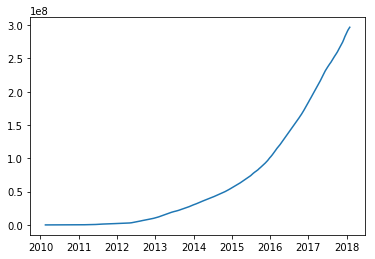

In [11]:
import matplotlib.pyplot as plt
plt.plot(data['Date'], data['btc_n_transactions_total'])
plt.show()

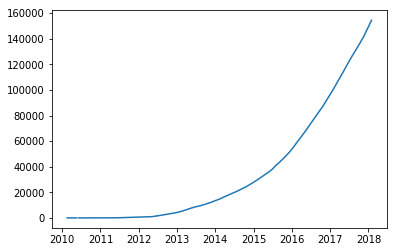

In [12]:
plt.plot(data['Date'], data['btc_blocks_size'])
plt.show()

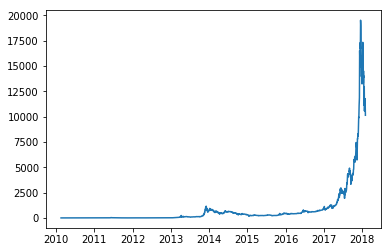

In [13]:
plt.plot(data['Date'], data['btc_market_price'])
plt.show()

We can observe that their is a noticable increase in the value of variables from 2015.So, we will restrict our analysis to data from 2015.

we can observe the following from the above visualization:
1. Outliers: we can see in 2016, there are two outliers in btc_median_confirmation_time and btc_transaction_fees, so we will remove those outliers 
2. Correlations: there can be correlation between the variables
3. There is a linear relationship between "btc_hash_rate" and "btc_difficulty"
4. The number of bitcoins dont have any relation with market value

In [14]:
X = data_imputed1.drop('btc_market_price',1).values
y = data_imputed1['btc_market_price']

Splitting dataset into test and train with 20% as the test size and random state as 10

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Predicting the best regressor by calculating R squared values and cross validation scores of different regressions.

### Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [23]:
linreg=model.fit(X_train,y_train)

In [24]:
print ('Residual sum of squares Train: %.2f' % np.mean((model.predict(X_train)- y_train) ** 2))
print ('Residual sum of squares Test: %.2f' % np.mean((model.predict(X_test)- y_test) ** 2))

Residual sum of squares Train: 224.06
Residual sum of squares Test: 224.82


In [25]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.9f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.9f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ -6.51482321e+01   1.87618523e+04   3.53289393e+01  -3.30874186e+03
   2.46220465e+01  -5.02061803e+00  -3.53587102e+01   2.71837721e+01
  -4.89086682e+02   2.14644905e+02   3.59189651e+02  -2.83485191e+02
   2.85284492e+00   4.19890014e+02   1.31997913e+02   4.78644008e+01
   3.44419869e+03  -2.34271168e+01   2.13056513e+01   6.27968112e+00
   3.86304445e+00   1.17350870e+02]
linear model intercept (b): -0.973
R-squared score (training): 0.999961762
R-squared score (test): 0.999926973


In [26]:
from sklearn.model_selection import cross_val_score

scores_train = cross_val_score(linreg, X_train, y_train, cv = 5)
print(scores_train)
scores_test = cross_val_score(linreg, X_test, y_test, cv = 5)
print(scores_test)

[ 0.99995414  0.99995759  0.99997575  0.99995483  0.99994322]
[ 0.99991082  0.99992594  0.99984442  0.99985947  0.99994161]


In [23]:
print("Average cross-validation score for training set: {:.9f}".format(scores_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_test.mean()))

Average cross-validation score for training set: 0.999957105
Average cross-validation score for testing set: 0.999896451


### Ridge regression

In [25]:
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
linridge = Ridge()
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10,100]}
grid_search_ridge= GridSearchCV(linridge, param_grid_ridge, cv = 5)
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [26]:
print('Best parameter {}'.format(grid_search_ridge.best_params_))
print('Best score {}'.format(grid_search_ridge.best_score_))

Best parameter {'alpha': 0.01}
Best score 0.9999246965077871


In [27]:

linridge = Ridge(alpha=0.01).fit(X_train, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.9f}'
     .format(linridge.score(X_train, y_train)))
print('R-squared score (test): {:.9f}'
     .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

ridge regression linear model intercept: -2.4339987133647583
ridge regression linear model coeff:
[ -4.17887310e+01   1.74497700e+04   3.06796145e+01  -1.82736901e+03
  -1.02789301e+01  -5.70145618e-01  -6.22561799e+01   4.48488068e+01
  -8.90017086e+02   8.65524084e+02   1.51873429e+03  -3.60871105e+02
   4.62666278e+00   3.68899284e+02   8.17225076e+01   7.00384435e+01
   1.96913665e+03  -1.48730445e+02   1.49874411e+02  -8.10973962e+00
  -1.25234822e+01   2.97732233e+02]
R-squared score (training): 0.999942870
R-squared score (test): 0.999848006
Number of non-zero features: 22


In [28]:
scores_linridge_train = cross_val_score(linridge, X_train, y_train, cv = 5)
print(scores_linridge_train)
scores_linridge_test = cross_val_score(linridge, X_test, y_test, cv = 5)
print(scores_linridge_test)

[ 0.99991812  0.99992228  0.99993871  0.99992264  0.99992172]
[ 0.99964035  0.99944995  0.99954771  0.99851572  0.9987237 ]


In [29]:
print("Average cross-validation score for training set: {:.9f}".format(scores_linridge_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_linridge_test.mean()))

Average cross-validation score for training set: 0.999924695
Average cross-validation score for testing set: 0.999175486


### Lasso regression

In [38]:
 from sklearn.linear_model import Lasso
lasso = Lasso()
param_lasso = {'alpha': [0.001,0.01,0.5,1,2,10,100]}
lasso.fit(X_train, y_train)
grid_search_lasso = GridSearchCV(lasso, param_lasso, cv =5)
grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.5, 1, 2, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print('Best parameter {}'.format(grid_search_lasso.best_params_))
print('Best score {}'.format(grid_search_lasso.best_score_))

Best parameter {'alpha': 0.01}
Best score 0.9999316736525535


In [40]:

linlasso = Lasso(alpha=0.01, max_iter = 10000).fit(X_train, y_train)

print('BitCoin dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))


BitCoin dataset
lasso regression linear model intercept: -17.829079576258664
lasso regression linear model coeff:
[  2.54104587e+01   1.88102154e+04  -1.71614624e+01  -9.46440456e+00
  -5.61091549e+01  -6.95360562e-02  -8.99158588e+01   3.94995509e+01
  -4.80766322e+02   2.56130438e+02   1.71688120e+02  -1.15104644e+02
   7.99959875e+00   5.02505415e+02   1.12363453e+02  -1.04072262e+02
   5.70987785e+01   4.27562444e+01   1.97999913e+02  -3.87458218e+00
  -1.97228068e+01   2.03483846e+02]
Non-zero features: 22
R-squared score (training): 0.9999381251879229
R-squared score (test): 0.9998862930683665

Features with non-zero weight (sorted by absolute magnitude):
	[  7.73936914e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.21401388e-05   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.91535130e-13   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.74240736e-03   0.00000000e+00   1.15590664e-04   2.38519467e-04
   7.92185895e-07   2.48654714e-04   3.67026583e-04  

In [41]:
scores_linlasso_train = cross_val_score(linlasso, X_train, y_train, cv = 5)
print(scores_linlasso_train)

scores_linlasso_test = cross_val_score(linlasso, X_test, y_test, cv = 5)
print(scores_linlasso_test)

[ 0.99992283  0.9999393   0.99995732  0.99993141  0.99990746]
[ 0.99987431  0.99988796  0.99979324  0.99982036  0.99993387]


In [42]:
print("Average cross-validation score for training set: {:.9f}".format(scores_linlasso_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_linlasso_test.mean()))

Average cross-validation score for training set: 0.999931663
Average cross-validation score for testing set: 0.999861948


### Polynomial regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.9f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.9f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.9f}'
     .format(linreg.score(X_test, y_test)))

print('\nNow we transform the original input data to add\n\
polynomial features up to degree 2 (quadratic)\n')
poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 10)
linreg = LinearRegression().fit(X_train, y_train)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.9f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.9f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.9f}\n'
     .format(linreg.score(X_test, y_test)))

print('\nAddition of many polynomial features often leads to\n\
overfitting, so we often use polynomial features in combination\n\
with regression that has a regularization penalty, like ridge\n\
regression.\n')

X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y,
                                                   random_state = 10)
linreg = Ridge().fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.9f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.9f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.9f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [ -6.51482321e+01   1.87618523e+04   3.53289393e+01  -3.30874186e+03
   2.46220465e+01  -5.02061803e+00  -3.53587102e+01   2.71837721e+01
  -4.89086682e+02   2.14644905e+02   3.59189651e+02  -2.83485191e+02
   2.85284492e+00   4.19890014e+02   1.31997913e+02   4.78644008e+01
   3.44419869e+03  -2.34271168e+01   2.13056513e+01   6.27968112e+00
   3.86304445e+00   1.17350870e+02]
linear model intercept (b): -0.973449155
R-squared score (training): 0.999961762
R-squared score (test): 0.999926973

Now we transform the original input data to add
polynomial features up to degree 2 (quadratic)

(poly deg 2) linear model coeff (w):
[  1.72485735e-02  -5.40128517e+00   4.61324677e+04  -3.37541666e+03
   1.14522245e+03   7.24294037e+01   1.70572015e+02   4.05414621e+01
   2.17084665e+01   2.90512110e+03  -7.74164895e+03   1.34767426e+03
   3.05814624e+02   1.60578067e+01   3.94060368e+03  -3.63122151e+02
  -1.70285060e+02  -1.49359341e+03   2.02420909e+02   1.90549960e+02

In [36]:
scores_linreg_train = cross_val_score(linreg, X_train, y_train, cv = 5)
print(scores_linreg_train)

scores_linreg_test = cross_val_score(linreg, X_test, y_test, cv = 5)
print(scores_linreg_test)

[ 0.99861118  0.99934177  0.99908155  0.99917938  0.99924046]
[ 0.99782165  0.995437    0.9921634   0.99501908  0.99121043]


In [37]:
print("Average cross-validation score for training set: {:.9f}".format(scores_linreg_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_linreg_test.mean()))

Average cross-validation score for training set: 0.999090870
Average cross-validation score for testing set: 0.994330311


# Support Vector Machine

### Linear SVM: using both C and epsilon parameter

In [39]:
from sklearn.svm import SVR

param_grid = {'C': [0.01, 0.1, 1, 10,100]}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [40]:
svr = SVR(kernel='linear', C=100)
svr.fit(X_train, y_train)
print('Linear SVR R-squared score (training): {:.9f}'
     .format(svr.score(X_train, y_train)))
print('Linear SVR R-squared score (test): {:.9f}'
     .format(svr.score(X_test, y_test)))

Linear SVR R-squared score (training): 0.998425970
Linear SVR R-squared score (test): 0.996723958


In [41]:
scores_svr_train = cross_val_score(svr, X_train, y_train, cv = 5)
print(scores_svr_train)
scores_svr_test = cross_val_score(svr, X_test, y_test, cv = 5)
print(scores_svr_test)

[ 0.99592539  0.9984082   0.99701269  0.99783096  0.99787434]
[ 0.99486067  0.98789549  0.98706764  0.98382706  0.97201294]


In [42]:
print("Average cross-validation score for training set: {:.9f}".format(scores_svr_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_svr_test.mean()))

Average cross-validation score for training set: 0.997410316
Average cross-validation score for testing set: 0.985132762


### Kernelized SVM: with RBF kernel

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR(kernel = 'rbf')
param_grid_kernel = {'C': [ 0.01, 0.1, 1, 10,100], 
            'gamma': [0.001,0.01, 0.1, 1],
            'epsilon': [0.001,0.01, 0.1, 1], }

In [17]:
grid_search_kernel = GridSearchCV(svr, param_grid_kernel, cv = 5)
grid_search_kernel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'epsilon': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
print('Best parameter {}'.format(grid_search_kernel.best_params_))
print('Best score {}'.format(grid_search_kernel.best_score_))

Best parameter {'C': 100, 'epsilon': 1, 'gamma': 1}
Best score 0.7134240479215957


In [19]:
clf=SVR(kernel = 'rbf',C=100,epsilon=1,gamma=1)
clf.fit(X_train, y_train)
print('Kernelized SVR R-squared score (training): {:.9f}'
     .format(clf.score(X_train, y_train)))
print('Kernelized SVR R-squared score (test): {:.9f}'
     .format(clf.score(X_test, y_test)))

Kernelized SVR R-squared score (training): 0.761553951
Kernelized SVR R-squared score (test): 0.833118794


In [27]:
scores_clf_train = cross_val_score(clf, X_train, y_train, cv = 5)
print(scores_clf_train)
scores_clf_test = cross_val_score(clf, X_test, y_test, cv = 5)
print(scores_clf_test)

[ 0.76814257  0.74509607  0.5865445   0.7158382   0.75158096]
[ 0.40841352  0.26879278  0.34397212  0.66614152  0.29870886]


In [28]:
print("Average cross-validation score for training set: {:.9f}".format(scores_clf_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_clf_test.mean()))

Average cross-validation score for training set: 0.713440459
Average cross-validation score for testing set: 0.397205761


# K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor()
knn_grid = {'n_neighbors':[1,2, 3,5, 7, 15, 55]}
grid_search_knn = GridSearchCV(knnreg, knn_grid, cv = 5)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 5, 7, 15, 55]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
print('Best parameter {}'.format(grid_search_knn.best_params_))
print('Best score {}'.format(grid_search_knn.best_score_))

Best parameter {'n_neighbors': 2}
Best score 0.9934420556088099


In [31]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 2).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('KNN R-squared test score: {}'
     .format(knnreg.score(X_test, y_test)))
print('KNN SVR R-squared score (training): {:.9f}'
     .format(knnreg.score(X_train, y_train)))

[  1.17979122e+03   6.37990000e-02   6.01601000e+00   3.52845543e+03
   7.99823000e-01   2.42255000e+02   0.00000000e+00   4.34030000e+02
   1.03905000e+02   7.78635531e+02   5.18750000e+00   2.82990000e-01
   9.98650000e+01   4.28500000e+02   2.63005000e-01   4.89457500e+00
   8.62495000e+00   1.12720010e+02   6.09153125e+02   8.20350000e+00
   1.27487642e+04   4.99000000e+00   6.29885000e+02   2.86149500e-01
   5.77690825e+02   2.48205000e+02   5.79907500e+00   5.69776306e+02
   4.81500000e+00   8.31075812e+02   4.64400000e+02   2.73575257e+03
   6.62675000e+00   7.51200000e-01   2.30210000e+02   5.57494452e+03
   2.30365000e+02   9.88900000e+01   8.09658000e+00   2.25915000e+02
   2.50000000e-01   1.01916015e+02   2.41575000e+02   8.18700000e+00
   1.50395000e+01   4.36870000e+02   1.08495000e+00   5.78705476e+02
   1.31800505e+02   2.32970000e+02   1.31294955e+02   3.27025000e+02
   7.75875000e+02   0.00000000e+00   6.67995000e-02   5.36000000e+00
   1.11499495e+02   7.59000000e-02

In [32]:
scores_knnreg_train = cross_val_score(knnreg, X_train, y_train, cv = 5)
print(scores_knnreg_train)
scores_knnreg_test = cross_val_score(knnreg, X_test, y_test, cv = 5)
print(scores_knnreg_test)

[ 0.99437636  0.99014461  0.99462821  0.99536189  0.99269761]
[ 0.97499175  0.99079344  0.99335187  0.93979779  0.96271426]


In [33]:
print("Average cross-validation score for training set: {:.9f}".format(scores_knnreg_train.mean()))
print("Average cross-validation score for testing set: {:.9f}".format(scores_knnreg_test.mean()))

Average cross-validation score for training set: 0.993441735
Average cross-validation score for testing set: 0.972329821


### Chosing the best model:  Lasso (based on average cross-validation score)

In [45]:
X1 = data_imputed.drop('btc_market_price',1).values
y1 = data_imputed['btc_market_price']

In [51]:
test = test.drop('Date',1).values

In [52]:
linlasso1 = Lasso(alpha=0.01, max_iter = 10000).fit(X1, y1)

In [53]:
y_predict=linlasso1.predict(test)

In [54]:
print(y_predict)

[  3.57812835e+15   3.52099919e+15   3.57655782e+15   3.36240245e+15
   2.86699364e+15   3.13740982e+15   3.34051321e+15   3.38544153e+15
   3.47937772e+15   3.41103824e+15   3.41877475e+15   3.56789682e+15
   3.50035860e+15   3.73484858e+15]
